In [1]:
# Import packages
import os
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import rasterio
import xarray

In [19]:
# Define filepath
filepath = '/Users/jimwy/OneDrive/Documents/FutureOfCoffee/'

# Define list of Landsat bands
files = sorted(glob.glob(filepath + '*.nc'))
print(files)

['/Users/jimwy/OneDrive/Documents/FutureOfCoffee\\coffeeclimate.nc']


In [11]:
!gdal_translate -b 1 -a_srs EPSG:4326 /Users/jimwy/OneDrive/Documents/FutureOfCoffee/coffeeclimate.grib coffeeclimate.tif

ERROR: Ran out of file reading SECT0
Input file size is 233, 137
0...10...20...30...40...50...60...70...80...90...100 - done.


In [16]:
import rasterio as rio
cclim = xarray.open_dataset("coffeeclimate.nc")

In [17]:
cclim

<xarray.Dataset>
Dimensions:    (longitude: 233, latitude: 137, time: 36)
Coordinates:
  * longitude  (longitude) float32 -117.0 -116.8 -116.5 ... -59.5 -59.25 -59.0
  * latitude   (latitude) float32 32.0 31.75 31.5 31.25 ... -1.5 -1.75 -2.0
  * time       (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2021-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-23 23:24:07 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

In [34]:
t2mf = (cclim['t2m'] - 273.15) * 9/5 + 32

In [35]:
t2mf

<xarray.DataArray 't2m' (time: 36, latitude: 137, longitude: 233)>
array([[[58.12807 , 56.00837 , 53.216194, ..., 66.81463 , 66.76948 ,
         66.723335],
        [59.052734, 57.097607, 54.341576, ..., 67.0822  , 67.00447 ,
         66.95564 ],
        [59.1721  , 58.524895, 55.98667 , ..., 67.31813 , 67.22321 ,
         67.13191 ],
        ...,
        [76.8029  , 76.78571 , 76.79203 , ..., 78.726395, 77.49526 ,
         77.34794 ],
        [76.87701 , 76.85893 , 76.862564, ..., 79.091576, 78.058426,
         77.2033  ],
        [76.95743 , 76.94029 , 76.92584 , ..., 77.977066, 77.9635  ,
         77.39403 ]],

       [[55.47509 , 52.933296, 48.862038, ..., 66.38441 , 66.390724,
         66.39435 ],
        [56.909576, 54.550373, 50.54602 , ..., 66.70076 , 66.69713 ,
         66.693504],
        [57.12381 , 56.290386, 52.78866 , ..., 66.96739 , 66.96382 ,
         66.95745 ],
...
        [71.01784 , 71.010635, 71.02871 , ..., 79.420616, 77.85232 ,
         77.638084],
        [71.25377 , 71.24651 , 71.25377 , ..., 80.00004 , 78.5872  ,
         77.56761 ],
        [71.482445, 71.482445, 71.503265, ..., 78.45344 , 78.505844,
         77.817055]],

       [[57.60199 , 55.46515 , 52.36019 , ..., 69.586975, 69.53814 ,
         69.51644 ],
        [58.924416, 56.948467, 53.658226, ..., 69.86174 , 69.832794,
         69.81928 ],
        [58.991264, 58.35494 , 55.506733, ..., 70.124756, 70.111244,
         70.121185],
        ...,
        [72.945   , 72.973015, 72.997406, ..., 78.85477 , 77.53234 ,
         77.36057 ],
        [73.0887  , 73.13479 , 73.169174, ..., 79.353714, 78.11264 ,
         77.19154 ],
        [73.21889 , 73.27492 , 73.32101 , ..., 78.04936 , 78.04936 ,
         77.46544 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -117.0 -116.8 -116.5 ... -59.5 -59.25 -59.0
  * latitude   (latitude) float32 32.0 31.75 31.5 31.25 ... -1.5 -1.75 -2.0
  * time       (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2021-12-01

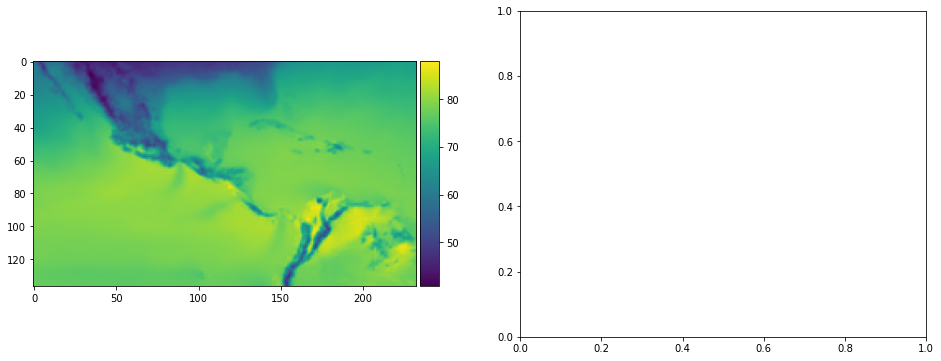

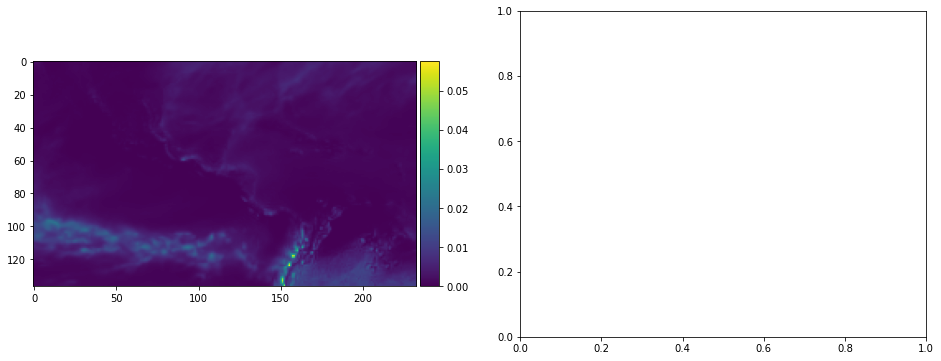

In [38]:
# Plot data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
im1 = ax1.imshow(t2mf[0,:,:])#cclim['t2mf'][0,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# Plot data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
im1 = ax1.imshow(cclim['tp'][0,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

In [32]:

temp_range = np.mean(xds_daily['t2m'], axis=0).argmax()
index = np.unravel_index(max_temp_value, np.mean(xds_daily['t2m'], axis=0).shape)
np.mean(xds_daily['t2m'], axis=0)[index]
print ('Highest average air temperature is found at Hacienda de los Tesoros, at 28.99 , -111.2')

AttributeError: 'DataArray' object has no attribute 'describe'